##### Bagging
-------------------

- Ensemble Methods
    - Voting Classifier
        - Different algorithms (Logistic regression,KNN clasifiers,DT classifier..etc)
        - Same **training set**(example : liver data set)
        
    - Bagging
        - One algorithm
        - Different **subsets** of the training set.
- Bagging stands for **Bootstrap Aggregation**.
- Uses a technique known as the bootsrap.
- Reduces variance of individual models in the ensemble.

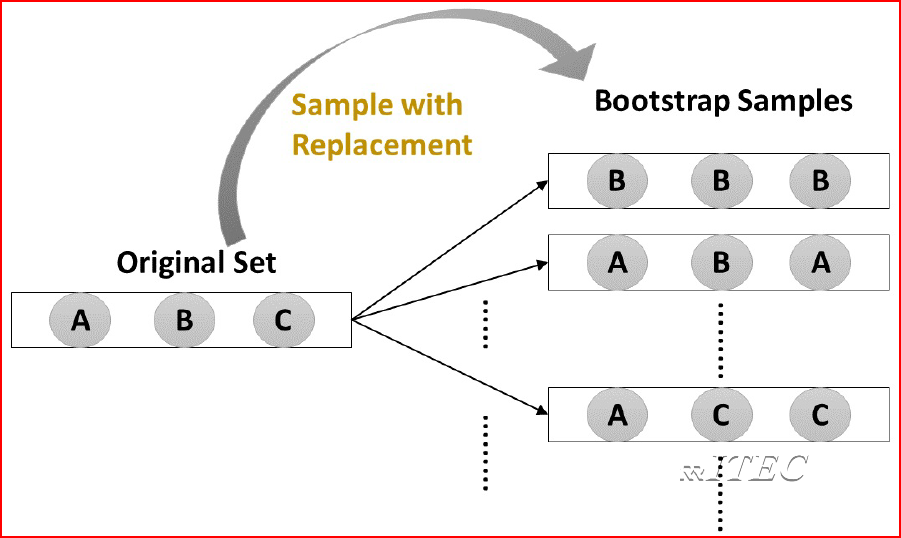

#### Bagging: Training
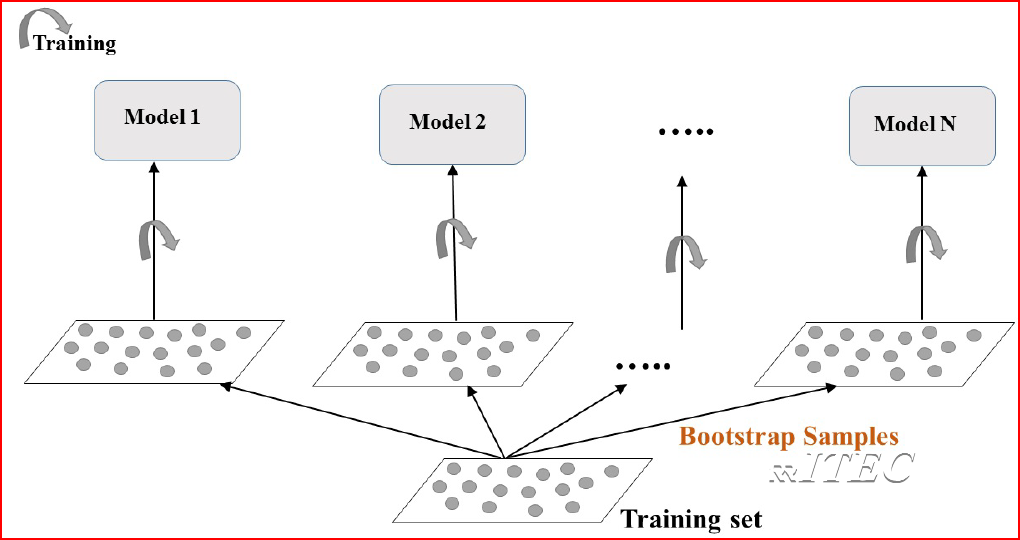

#### Bagging: Prediction
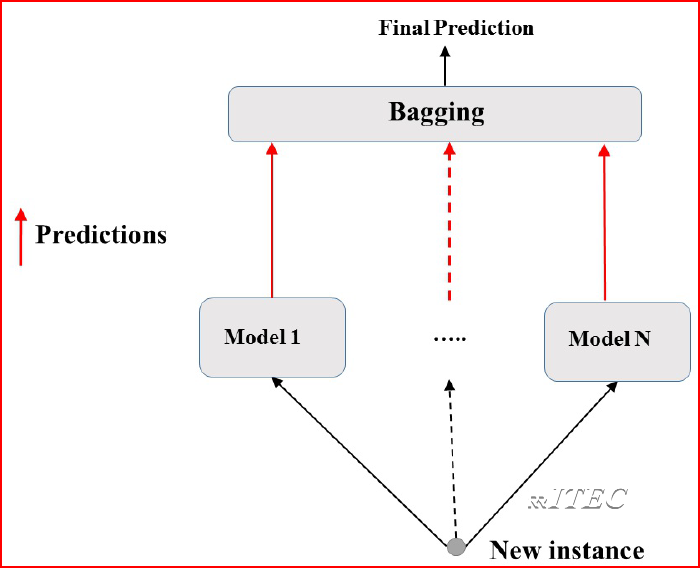

- Bagging: Classification & Regression
    - Classification:
        - Aggregates predictions by majority voting.
        - BaggingClassifier in scikit-learn.
    - Regression:
        - Aggregates predictions through averaging.
        - BaggingRegressor in scikit-learn.

> **Project:** Use bagging classifiers to predict whether a patient suffers from a liver disease using all the features present in the dataset.

[Read dataset](https://www.kaggle.com/jeevannagaraj/indian-liver-patient-dataset)

## Step 1: Import required modules

In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier # metaestimator # max count/voting
from sklearn.ensemble import BaggingRegressor # meta estimator # avg
from sklearn.metrics import accuracy_score

In [2]:
BaggingClassifier?

## Step 2: Import Data

In [2]:
#os.chdir("C:\\Users\\Hi\\Google Drive\\01 Data Science Lab Copy\\02 Lab Data\\Python")
df = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null object
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [14]:
df.head(10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,2,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,2,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,2,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,2,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,2,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,1,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,1,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,2,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,2,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [6]:
df['gender'] = np.where(df['gender'] == 'Female', 1, 2)
df.info()
data = df.as_matrix().astype(np.float64)
#Dropped na values
data = data[~np.isnan(data).any(axis=1)].copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null int32
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int32(1), int64(5)
memory usage: 47.9 KB


# Step 3: Split Data

In [7]:
# Set seed for reproducibility
SEED=1
# Splitting data into train and test data
X, y = data[:,:-1], data[:,-1]

In [8]:
X

array([[65.  ,  1.  ,  0.7 , ...,  6.8 ,  3.3 ,  0.9 ],
       [62.  ,  2.  , 10.9 , ...,  7.5 ,  3.2 ,  0.74],
       [62.  ,  2.  ,  7.3 , ...,  7.  ,  3.3 ,  0.89],
       ...,
       [52.  ,  2.  ,  0.8 , ...,  6.4 ,  3.2 ,  1.  ],
       [31.  ,  2.  ,  1.3 , ...,  6.8 ,  3.4 ,  1.  ],
       [38.  ,  2.  ,  1.  , ...,  7.3 ,  4.4 ,  1.5 ]])

In [9]:
type(X)

numpy.ndarray

In [10]:
X.ndim

2

In [15]:
y[:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1.])

In [16]:
type(y)

numpy.ndarray

In [17]:
y.ndim

1

In [18]:
StandardScaler?

In [19]:
X = StandardScaler().fit_transform(X)

In [20]:
X

array([[ 1.24740264, -1.77079482, -0.42031984, ...,  0.29372174,
         0.20344649, -0.14738974],
       [ 1.06230624,  0.56471817,  1.21893587, ...,  0.93965456,
         0.07746198, -0.64846078],
       [ 1.06230624,  0.56471817,  0.64037503, ...,  0.47827397,
         0.20344649, -0.17870668],
       ...,
       [ 0.44531827,  0.56471817, -0.40424871, ..., -0.07538274,
         0.07746198,  0.16577966],
       [-0.85035649,  0.56471817, -0.32389304, ...,  0.29372174,
         0.329431  ,  0.16577966],
       [-0.4184649 ,  0.56471817, -0.37210644, ...,  0.75510233,
         1.5892761 ,  1.73162664]])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=SEED)
print("train martix:{} \ntest matrix {}".format(X_train.shape, X_test.shape))

train martix:(463, 10) 
test matrix (116, 10)


In [22]:
X_train

array([[-1.71413966,  0.56471817, -0.38817757, ...,  0.75510233,
         1.08533806,  0.79211845],
       [-2.02263365,  0.56471817, -0.37210644, ...,  0.66282621,
         0.70738453,  0.16577966],
       [-0.78865769,  0.56471817,  2.35998641, ..., -0.99814391,
        -0.67844508, -0.14738974],
       ...,
       [ 1.86439061, -1.77079482, -0.40424871, ..., -1.92090509,
        -1.43435214, -0.46055914],
       [-1.40564567,  0.56471817, -0.40424871, ...,  1.30875903,
         0.83336904, -0.14738974],
       [ 0.07512548, -1.77079482,  1.7492833 , ..., -2.01318121,
        -1.43435214, -0.46055914]])

In [24]:
y_train[:10]

array([2., 1., 1., 1., 1., 1., 1., 2., 1., 1.])

# Step 4: Fit dt and Bagging classifiers 

In [25]:
BaggingClassifier?

In [ ]:
BaseException

In [26]:
# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

In [29]:
# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=50, 
                       random_state=1)

In [30]:
# Fit dt to the training set
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [31]:
# Fit bc to the training set
bc.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=50, n_jobs=1, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

# Step 5: predict dt and Bagging classifiers 

In [32]:
# Predict test set labels
y_pred_dt = dt.predict(X_test)

# Evaluate acc_test
acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Test set accuracy of dt: {:.2f}'.format(acc_test_dt))

Test set accuracy of dt: 0.66


In [33]:
# Predict test set labels
y_pred_bc = bc.predict(X_test)

# Evaluate acc_test
acc_test_bc = accuracy_score(y_test, y_pred_bc)
print('Test set accuracy of bc: {:.2f}'.format(acc_test_bc))

Test set accuracy of bc: 0.70


**Which alogorithm is good on this data set ?**

<input type="radio" disabled> DecisionTreeClassifier

<input type="radio" disabled checked> BaggingClassifier

# Do we have any other method for accuracy calculation?
- yes ,Out of Bag Evaluation

# Out of Bag Evaluation

- Some rows may be sampled several times for one model,other rows may not be sampled at all
- On average, for each model, **63%** of the training instances are sampled.
- The remaining **37%** constitute the OOB instances
- OOB Evaluation

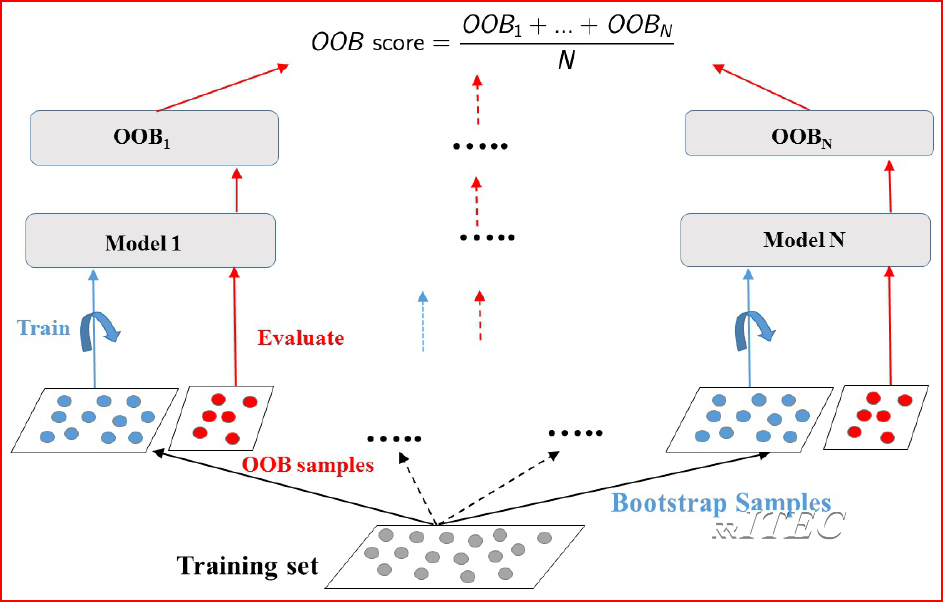

In [11]:
# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
                       n_estimators=50,
                       oob_score=True, # extra parameter
                       random_state=1)

In [12]:
# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.689


# Almost same so we can trust this too